# データ初期化

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import math

In [2]:
transform = transforms.ToTensor()

train_data = datasets.MNIST("./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST("./data", train=False, download=True, transform=transform)

In [3]:
loader_train = DataLoader(train_data, batch_size=128, shuffle=True)
loader_test = DataLoader(test_data, batch_size=128, shuffle=False)

image, label = train_data[0]

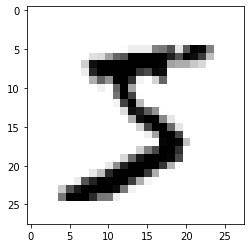

In [4]:
plt.imshow(image.reshape(28, 28), cmap="gist_yarg")

In [5]:
# mnist data from torch already normalized to scale between 0 and 1!
image.reshape(28, 28) 

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [6]:
# (x_train, t_train), (x_test, t_test) = mnist.load_data()
# x_train = x_train.reshape(60000, 1, 28, 28)
# x_test = x_test.reshape(10000, 1, 28, 28)

# x_train = (x_train / 255)
# x_test = (x_test / 255)

# x_train, t_train, x_test, t_test = map(
#     torch.tensor,
#     (x_train, t_train, x_test, t_test)
# )

# x_train = x_train.data.type(torch.float32)
# x_test = x_test.data.type(torch.float32)
# t_train = t_train.data.type(torch.float32)
# t_test = t_test.data.type(torch.float32)

# # y_train = torch.nn.functional.one_hot(y_train.to(torch.int64), num_classes=10)
# # y_test = torch.nn.functional.one_hot(y_test.to(torch.int64), num_classes=10)

# from torch.utils.data import TensorDataset, DataLoader

# ds_train = TensorDataset(x_train, t_train)
# ds_test = TensorDataset(x_test, t_test)

# loader_train = DataLoader(ds_train, batch_size=128, shuffle=True)
# loader_test = DataLoader(ds_train, batch_size=128, shuffle=False)

# スクラッチ

In [7]:
# w1 = torch.rand(784, 50, requires_grad=True, dtype=torch.float)
# w2 = torch.rand(50, 50, requires_grad=True, dtype=torch.float)
# w3 = torch.rand(50, 25, requires_grad=True, dtype=torch.float)
# w4 = torch.rand(25, 10, requires_grad=True, dtype=torch.float)

# for t in range(100):
#     h1 = x_train @ w1
#     z1 = torch.relu(h1)
#     h2 = z1 @ w2
#     z2 = torch.relu(h2)
#     h3 = z2 @ w3
#     z3 = torch.relu(h3)
#     h4 = z3 @ w4
#     y_pred = torch.sigmoid(torch.div(h4, torch.max(h4)))
    
#     loss = (y_pred - y_train).pow(2).sum()
    
#     if (t % 10 == 9):
#         print(t, loss.item() // 1)
# #         print(y_pred[0], y_train[0], h4[0], h3[0], h2[0], h1[0])
    
#     loss.backward()
    
#     with torch.no_grad():
#         w1 -= 0.01 * w1.grad
#         w2 -= 0.01 * w2.grad
#         w3 -= 0.01 * w3.grad
#         w4 -= 0.01 * w4.grad
        
#         w1.grad.zero_()
#         w2.grad.zero_()
#         w3.grad.zero_()
#         w4.grad.zero_()


# nn

In [8]:
channel = 1 # num of color (only gray here)
image = 28 # num of pixels of image
layer_num = 32 # num of layers wanted to be generated
kernel_size = 3 # size of conv, need to be squire size
pool_size = 7 # pooling size
output = 10 # last size

model = torch.nn.Sequential(
  torch.nn.Conv2d(channel, layer_num, kernel_size),
  torch.nn.ReLU(),
  torch.nn.MaxPool2d(pool_size, pool_size),
  torch.nn.Flatten(),
  torch.nn.Linear(((image - kernel_size + 1) // pool_size) ** 2 * layer_num, output),
)

from torchsummary import summary
summary(model, input_size=(channel,image,image))


optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(1):
  loss_train = []
  loss_test = []
  train_num = 0
  test_num = 0
  train_true_num = 0
  test_true_num = 0
  
  model.train()
  for x, t in loader_train:
    optimizer.zero_grad()
    
    y = model(x)
    
    loss = criterion(y, t.long())
    loss.backward()

    optimizer.step()
    
    loss_train.append(loss.tolist())
    train_num += t.shape[0]
    train_true_num += (y.argmax(1) == t).sum().item()
  
  model.eval()
  for x, t in loader_test:
    y = model(x)
    loss = criterion(y, t.long())
    loss_test.append(loss.tolist())
    test_num += t.shape[0]
    test_true_num += (y.argmax(1) == t).sum().item()
        
  print("エポック：{}, 訓練正解率:{:.3f}, テスト正解率：{:.3f}".format(epoch + 1, train_true_num/train_num, test_true_num/test_num))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3             [-1, 32, 3, 3]               0
           Flatten-4                  [-1, 288]               0
            Linear-5                   [-1, 10]           2,890
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.33
Params size (MB): 0.01
Estimated Total Size (MB): 0.35
----------------------------------------------------------------
エポック：1, 訓練正解率:0.758, テスト正解率：0.917


In [9]:
import torch.nn.functional as F

In [140]:
class ConvolutionalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1)
        self.fn3 = nn.Linear(in_features=13*13*16, out_features=256)
        self.fn4 = nn.Linear(in_features=256, out_features=10)

    def forward(self, X):
        X = F.relu(self.fn1(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.reshape(-1, 13*13*16)
        X = F.relu(self.fn3(X))
        X = F.log_softmax(self.fn4(X), dim=1)
        return X


ConvolutionalModel(
  (fn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (fn3): Linear(in_features=2704, out_features=256, bias=True)
  (fn4): Linear(in_features=256, out_features=10, bias=True)
)

In [143]:
model = ConvolutionalModel()
model

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 2

for epoch in range(epochs):
    model.train()
    
    epoch+=1

    loss_log = []
    correct_count = 0
    total_count = 0
    
    test_correct_count = 0
    test_total_count = 0

    for b, (X_train, T_train) in enumerate(loader_train):
        y = model.forward(X_train)
        loss = criterion(y, T_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct_count += (y.argmax(axis=1) == T_train).sum()
        total_count += 128
        
        
        if b % 100 == 0:
            print(f"epoch {epoch:3.0f} batch {b:4.0f} loss: {loss.item():3.3f} acc {float(correct_count)/float(total_count):3.3f} ")

    loss_log.append(loss.item)

    with torch.no_grad():
        
        for b, (X_test, T_test) in enumerate(loader_test):
            y = model.forward(X_test)
            loss = criterion(y, T_test)

            test_correct_count += (y.argmax(axis=1) == T_test).sum()
            test_total_count += 128

            if b % 100 == 0:
                print(f"epoch {epoch:3.0f} batch {b:4.0f} testloss: {loss.item():3.3f} testacc {float(test_correct_count)/float(test_total_count):3.3f} ")


epoch   1 batch    0 loss: 2.297 acc 0.133 
epoch   1 batch  100 loss: 0.260 acc 0.830 
epoch   1 batch  200 loss: 0.268 acc 0.879 
epoch   1 batch  300 loss: 0.237 acc 0.901 
epoch   1 batch  400 loss: 0.136 acc 0.916 
epoch   1 batch    0 testloss: 0.049 testacc 0.992 
epoch   2 batch    0 loss: 0.123 acc 0.961 
epoch   2 batch  100 loss: 0.044 acc 0.968 
epoch   2 batch  200 loss: 0.088 acc 0.972 
epoch   2 batch  300 loss: 0.044 acc 0.972 
epoch   2 batch  400 loss: 0.062 acc 0.973 
epoch   2 batch    0 testloss: 0.032 testacc 0.992 
